# Setup

## Import packages and modules

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import magic

## Change these names to the appropriate values:

List all the prefixes of the different output files you want to plot:

In [2]:
stats = ['your_prefix1', 'your_prefix2', 'your_prefix3'] 
# Example: ['chr1_pair', 'chr1_tbl', 'chr2_pair', 'itip']

List just the prefixes that correspond to pairwise coalescence time distributions:

In [3]:
pairstats = ['your_prefix1', 'your_prefix2'] 
# Example: ['chr1_pair', 'chr2_pair']
# Every element of pairstats should also be in stats

# (We separate out the pairwise ones because they're the only ones where 
#         talking about "N_e(t)" even begins to make sense.)

## Unscale times and "N_e"

MAGIC scales all times by the per-base mutation rate. To change to clock time, you need to know the mutation rate per generation and the generation time. Enter them here:

In [ ]:
# These are set to default values that convert human data to years.
mu = 1.25e-8 # mutation rate
gen = 30 # generation time

These are the corresponding conversion factors:

In [ ]:
tfactor = mu/gen
# For the pairwise distributions, there is an additional factor of 2 to convert from total branch length to TMRCA:
tmrcafactor = 2*tfactor
nfactor = 4*mu

## Import data

In [4]:
MAGIC = {stat: {} for stat in stats}

for stat in stats:
    with open(stat + '_final.txt', 'r') as infile:
        # If you generated your *_final.txt files using magic.py's (default) '--family pieceexp':
        MAGIC[stat]['T'] = magic.PiecewiseExponential(*np.transpose([[float(x) for x in line.split()] for line in infile]))
        # If you used the '--family gammamix' option:
        # MAGIC[stat]['T'] = magic.GammaMix([float(x) for line in infile for x in line.split()])
    with open(stat + '_LT.txt'.format(stat), 'r') as infile:
        MAGIC[stat]['LT'] = np.array([[float(x) for x in line.split()] for line in infile])

# Plots

### Style settings

In [5]:
plt.style.use('seaborn-talk')
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['ytick.major.size'] = 10
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255

statcolors = {stat: tableau20[i*20//len(stats)] for i, stat in enumerate(stats)}

## Cumulative distributions

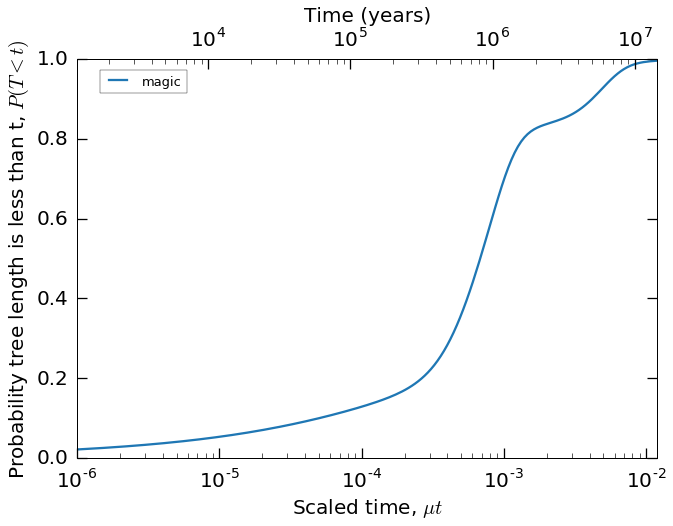

In [14]:
tvals = np.logspace(-6, -1.5, 200)

for stat in stats:
    plt.plot(tvals, MAGIC[stat]['T'].cdf(tvals), c=statcolors[stat], label=stat)

plt.xscale('log')
plt.ylim(0,1)
plt.xlim(1e-6,1.2e-2)
plt.legend(bbox_to_anchor=(.2, .99))
plt.xlabel('Scaled time, $\mu t$')
plt.ylabel('Probability tree length is less than t, $P(T<t)$')

tlim = plt.gca().get_xlim()

plt.twiny()
plt.xscale('log')
plt.xlim(t/tfactor for t in tlim)
plt.xlabel('Time (years)')

## Laplace transforms

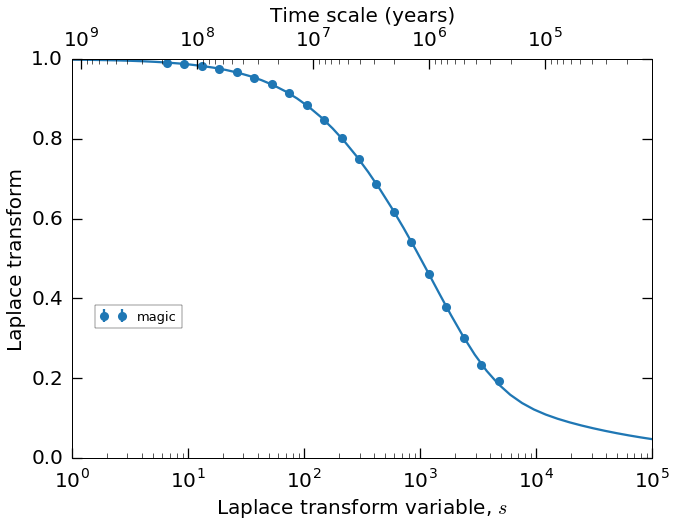

In [18]:
# Plot the original inferred Laplace transform values as points, and show fitted curves.
# The top x-axis gives the time scale that each point roughly corresponds to.
# Note that small s ~ long time, and vice versa.

srange = np.logspace(0, 5)

for stat in stats:
    plt.errorbar(*zip(*MAGIC[stat]['LT']), fmt='o', c=statcolors[stat], label=stat) 
    plt.plot(srange, MAGIC[stat]['T'].lt(srange), c=statcolors[stat])
    
plt.xscale('log')
plt.legend(bbox_to_anchor=(.2, .4))
plt.xlabel('Laplace transform variable, $s$')
plt.ylabel('Laplace transform')

slim = plt.gca().get_xlim()

plt.twiny()
plt.xscale('log')
plt.xlim(1/(s*tfactor) for s in slim)
plt.xlabel(r'Time scale (years)')

## "Effective population size"

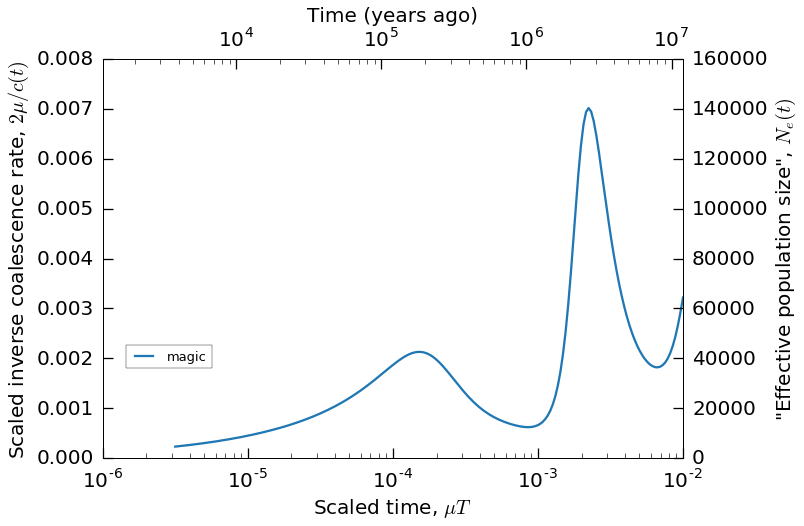

In [13]:
pairrange = np.logspace(-5.5, -2, 200)

for stat in pairstats:
    plt.plot(pairrange, MAGIC[stat]['T'].ne(pairrange), c=statcolors[stat], label=stat)

plt.xscale('log')
plt.xlabel(r'Scaled time, $\mu T$')
plt.ylabel(r'Scaled inverse coalescence rate, $2\mu/c(t)$')
plt.tick_params(which='both', top='off', right='off')
plt.legend(bbox_to_anchor=(.2, .3))

tlim = plt.gca().get_xlim()
nlim = plt.gca().get_ylim()

plt.twinx()
plt.ylim(n/nfactor for n in nlim)
plt.ylabel(r'"Effective population size", $N_e(t)$')

plt.twiny()
plt.xscale('log')
plt.xlim(t/tmrcafactor for t in tlim)
plt.xlabel('Time (years ago)')